In [1]:
import sys
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

sys.path.append("../src/")
from fLe_twobath_ftd import fle_twobath
import fBm_stats as fbs
import mittag_leffler as ml
plt.style.use("plot_style.mplstyle")

In [2]:
DATA_PATH = "data/two_baths/"

In [3]:
T = 20
h = 0.1
realizations = 20000

In [4]:
def msd_analytical_colored(fle):
    
    H = fle.H
    
    eta_H = fle.eta_H
    M = fle.M
    kBT = fle.kBT
    t = fle.t
    
    order = 2 - 2*H
    #*gamma(1-order)
    z = -(eta_H/M)*t**(2-order)
    return 2*kBT/(M) * (t**2) * ml.mittag_leffler(z, 2-order, 3)

In [5]:
def msd_analytical_all(fle, relaxation_type = 2):
        H = fle.H
        eta_H = fle.eta_H
        M = fle.M
        eta_12 = fle.eta_12 
        t = fle.t
        kBT = fle.kBT
                        
        def msd1(t):            
            order = 2 - 2*H
            z = -(eta_H/M)*t**(2-order)
            G = pd.DataFrame()
            inf = 40
            for n in range(inf):
                G[f"n{n}"] = ml.Prabhakar_mittag_leffler(z, 2-order, 3 + n, n+1) * (t**(2+n)) * ((-eta_12/M)**n)
            
            return np.array(G.sum(axis = 1))
        
        def msd2(t):            
            order = 2 - 2*H
            z = -(eta_H/M)*t
            G = pd.DataFrame()
            inf = 40
            for n in range(inf):
                t_ = ((-eta_12/M)**n)*t**((2-order)*n+1)
                G[f"n{n}"] = ml.Prabhakar_mittag_leffler(z, 1 , (2-order)* n + 2, n+1) * t_
            
            return np.array(G.sum(axis = 1))
        
        if relaxation_type == 1:
            return 2*kBT/M*msd1(t)
        if relaxation_type == 2:
            return 2*kBT/M*msd2(t)

In [11]:
def msd(H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations, h):
    for r in tqdm(range(realizations)):
        eq = fle_twobath(H)
        eq.params(T, h, v0 = v0, 
                  M = M, eta_H = eta_H, eta_12 = eta_12, 
                  theta_12 = theta_12, theta_H = theta_H)
        eq.make_B_H()
        eq.solve()        
        if r == 0:
            df_msd = pd.DataFrame({"t": eq.t})
        df_msd["x_"+str(r)] = eq.numerical        
    df_msd.set_index("t", inplace = True)
    msd = fbs.msd(df_msd, False)
    return msd

In [14]:
def plot_msd(ax, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations = 100, h = 0.01):
    eq = fle_twobath(H)
    eq.params(T, h, v0 = v0, 
        M = M, eta_H = eta_H, eta_12 = eta_12, 
        theta_12 = theta_12, theta_H = theta_H)
    eq.make_B_H()
    if eta_12 == 0 and theta_12 == 0: 
        anl = msd_analytical_colored(eq)
        
    if eta_12 != 0 and theta_12 != 0 and eta_H != 0 and theta_H != 0: 
        anl = msd_analytical_all(eq, relaxation_type = 1)

    df_msd = pd.DataFrame(msd(H = H, T = T, v0 = v0,
                            M = M, eta_H = eta_H, eta_12 = eta_12, 
                            theta_12 = theta_12, theta_H = theta_H,
                            realizations = realizations, h = h), columns=["msd"])

    ax.plot(eq.t, anl, label = "Analytical")
    ax.plot(df_msd.index, df_msd.msd, label = "Numerical", ls = ":")
    ax.set_title(f"H={H}")

0.50001


100%|██████████| 20000/20000 [02:43<00:00, 122.61it/s]


0.6


100%|██████████| 20000/20000 [02:44<00:00, 121.70it/s]


0.7


100%|██████████| 20000/20000 [02:41<00:00, 123.64it/s]


0.8


100%|██████████| 20000/20000 [02:41<00:00, 123.97it/s]


0.9


100%|██████████| 20000/20000 [06:15<00:00, 53.31it/s]


0.99


100%|██████████| 20000/20000 [06:19<00:00, 52.72it/s]


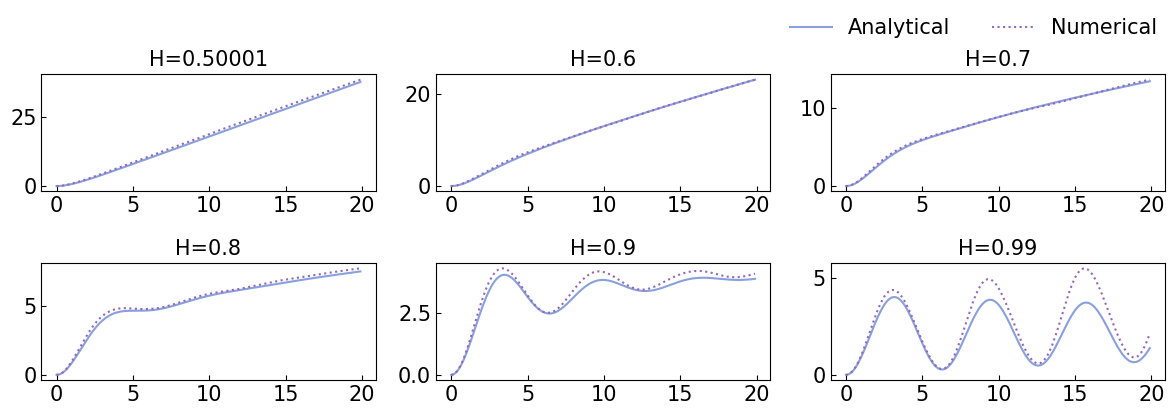

In [8]:
fig, ax = plt.subplots(2,3, figsize = (12,4))

M = 1
eta_H = 1#float(sys.argv[3])
eta_12 = 0#float(sys.argv[4])
theta_12 = 0#float(sys.argv[5])
theta_H = 1#float(sys.argv[6])
v0 = 1

H = 0.50001
print(H)
axi=ax[0,0]
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

H = 0.6
axi=ax[0,1]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

H = 0.7
axi=ax[0,2]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

H = 0.8
axi=ax[1,0]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

H = 0.9
axi=ax[1,1]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

H = 0.99
axi=ax[1,2]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

fig.tight_layout()
handles, labels = axi.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (0.99, 1.07), ncol = 2)

0.6


  2%|▏         | 303/20000 [00:02<02:12, 149.14it/s]

100%|██████████| 20000/20000 [02:43<00:00, 122.30it/s]


0.7


100%|██████████| 20000/20000 [02:46<00:00, 119.85it/s]


0.9


100%|██████████| 20000/20000 [06:27<00:00, 51.63it/s]


0.99


100%|██████████| 20000/20000 [06:17<00:00, 52.97it/s]


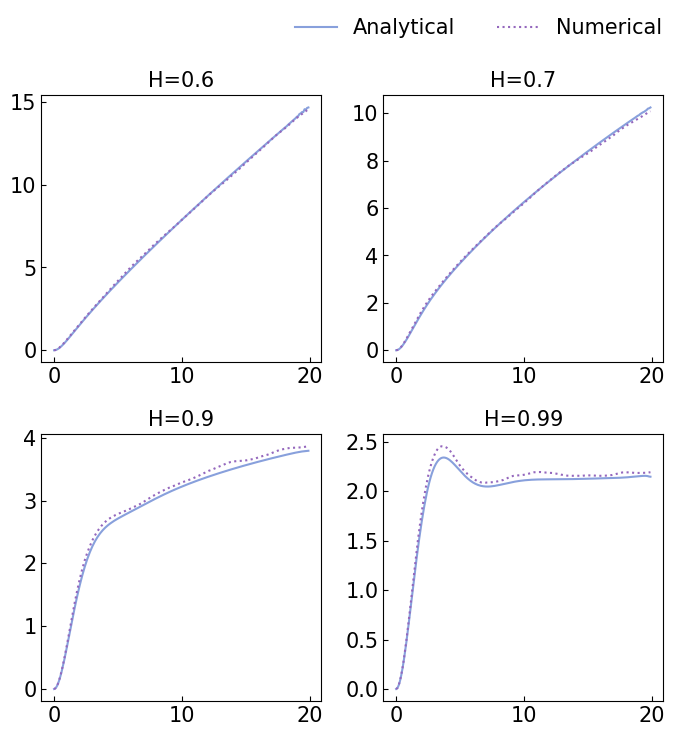

In [9]:
fig, ax = plt.subplots(2,2, figsize = (7,7))

M = 1
eta_H = 1#float(sys.argv[3])
eta_12 = 1#float(sys.argv[4])
theta_12 = 1#float(sys.argv[5])
theta_H = 1#float(sys.argv[6])
v0 = 1

H = 0.6
axi=ax[0,0]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

H = 0.7
axi=ax[0,1]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

H = 0.9
axi=ax[1,0]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

H = 0.99
axi=ax[1,1]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

fig.tight_layout()
handles, labels = axi.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (0.99, 1.07), ncol = 2)



0.6


100%|██████████| 40000/40000 [05:34<00:00, 119.76it/s]


0.7


100%|██████████| 40000/40000 [05:36<00:00, 118.96it/s]


0.9


100%|██████████| 40000/40000 [12:11<00:00, 54.68it/s]


0.99


100%|██████████| 40000/40000 [12:12<00:00, 54.61it/s]


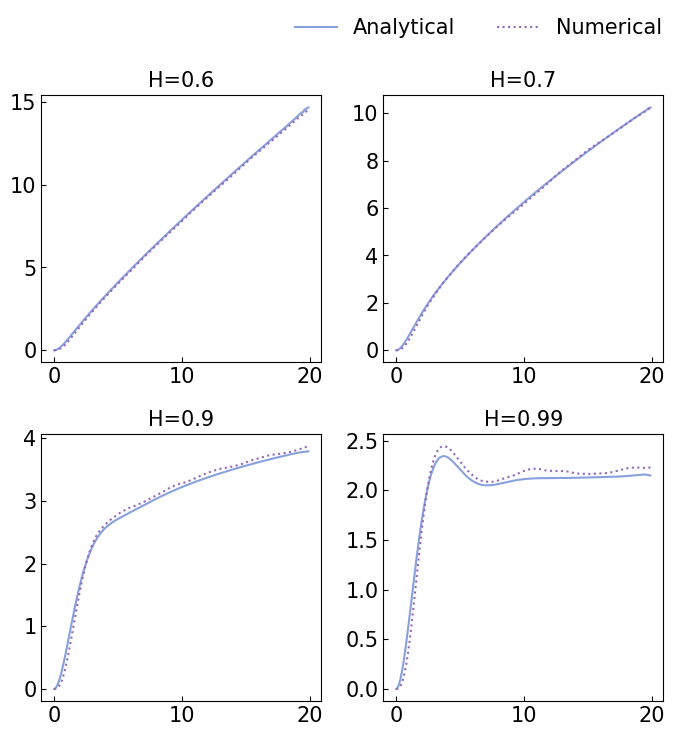

In [18]:
fig, ax = plt.subplots(2,2, figsize = (7,7))

M = 1
eta_H = 1#float(sys.argv[3])
eta_12 = 1#float(sys.argv[4])
theta_12 = 1#float(sys.argv[5])
theta_H = 1#float(sys.argv[6])
v0 = 0
realizations = 40000

H = 0.6
axi=ax[0,0]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

H = 0.7
axi=ax[0,1]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

H = 0.9
axi=ax[1,0]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

H = 0.99
axi=ax[1,1]
print(H)
plot_msd(axi, H, T, v0, M, eta_H, eta_12, theta_12, theta_H,
        realizations,  h)

fig.tight_layout()
handles, labels = axi.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (0.99, 1.07), ncol = 2)

